# 机器学习工程师纳米学位
## 强化学习
## 项目 4: 训练智能出租车学会驾驶

欢迎来到机器学习工程师纳米学位的第四个项目！在这个notebook文件中，模板代码已经提供给你，有助于你对*智能出租车*的分析和实现学习算法。你无须改动已包含的代码，除非另有要求。 你需要回答notebook文件中给出的与项目或可视化相关的问题。每一个你要回答的问题前都会冠以**'问题 X'**。仔细阅读每个问题，并在后面**'回答'**文本框内给出完整的回答。你提交的项目会根据你对于每个问题的回答以及提交的`agent.py`的实现来进行评分。 

>**提示：** Code 和 Markdown 单元格可通过 **Shift + Enter** 快捷键来执行。此外，Markdown可以通过双击进入编辑模式。

-----

## 开始
在这个项目中，你将构建一个优化的Q-Learning驾驶代理程序，它会操纵*智能出租车* 通过它的周边环境到达目的地。因为人们期望*智能出租车*要将乘客从一个地方载到另一个地方，驾驶代理程序会以两个非常重要的指标来评价：**安全性**和**可靠性**。驾驶代理程序在红灯亮时仍然让*智能出租车*行驶往目的地或者勉强避开事故会被认为是**不安全**的。类似的，驾驶代理程序频繁地不能适时地到达目的地会被认为**不可靠**。最大化驾驶代理程序的**安全性**和**可靠性**保证了*智能出租车*会在交通行业获得长期的地位。

**安全性**和**可靠性**用字母等级来评估，如下：

| 等级 	| 安全性 	| 可靠性 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	| 代理程序没有任何妨害交通的行为，<br/>并且总是能选择正确的行动。| 代理程序在合理时间内到达目的地的次数<br />占行驶次数的100%。 |
|   A   	| 代理程序有很少的轻微妨害交通的行为，<br/>如绿灯时未能移动。| 代理程序在合理时间内到达目的地的次数<br />占行驶次数的90%。 |
|   B   	| 代理程序频繁地有轻微妨害交通行为，<br/>如绿灯时未能移动。| 代理程序在合理时间内到达目的地的次数<br />占行驶次数的80%。 |
|   C   	| 代理程序有至少一次重大的妨害交通行为，<br/>如闯红灯。| 代理程序在合理时间内到达目的地的次数<br />占行驶次数的70%。 |
|   D   	| 代理程序造成了至少一次轻微事故，<br/>如绿灯时在对面有车辆情况下左转。	| 代理程序在合理时间内到达目的地的次数<br />占行驶次数的60%。 |
|   F   	| 代理程序造成了至少一次重大事故，<br/>如有交叉车流时闯红灯。	| 代理程序在合理时间内到达目的地的次数<br />未能达到行驶次数的60%。 |

为了协助评估这些重要的指标，你会需要加载可视化模块的代码，会在之后的项目中用到。运行下面的代码格来导入这个代码，你的分析中会需要它。

In [1]:
# 检查你的Python版本
from sys import version_info
if version_info.major != 2 and version_info.minor != 7:
    raise Exception('请使用Python 2.7来完成此项目')

In [2]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### 了解世界
在开始实现你的驾驶代理程序前，首先需要了解*智能出租车*和驾驶代理程序运行的这个世界（环境）。构建自我学习的代理程序重要的组成部分之一就是了解代理程序的特征，包括代理程序如何运作。原样直接运行`agent.py`代理程序的代码，不需要做任何额外的修改。让结果模拟运行一段时间，以观察各个不同的工作模块。注意在可视化模拟程序（如果启用了），**白色车辆**就是*智能出租车*。

### 问题 1
用几句话，描述在运行默认的`agent.py`代理程序中，你在模拟程序里观察到了什么。一些你可以考虑的情况：
- *在模拟过程中，智能出租车究竟移动了吗？*
- *驾驶代理程序获得了什么样的奖励？*
- *交通灯的颜色改变是如何影响奖励的？*

**提示：** 从顶层的`/smartcab/`目录（这个notebook所在的地方），运行命令
```bash
'python smartcab/agent.py'
```

**回答：**

- 在每次模拟过程中，我观察到智能出租车会出现在随机的初始位置上，然后并不发生移动；
- 代理程序采用了赋分的方式来对只能出租车的行为进行奖励或者惩罚；
- 我观察到在模拟过程中，智能出租车在以下几种情形下受到了奖励或者惩罚：
    - 交通灯为红灯，cab 未发生移动---2~3分的奖励；
    - 交通灯为绿灯，行驶方向道路畅通，cab 未发生移动--- -5~-6分的惩罚；
    - 交通灯为绿灯，行驶方向有前车，cab 未发生移动--- 0~1分的奖励。

### 理解代码
除了要了解世界之外，还需要理解掌管世界、模拟程序等等如何运作的代码本身。如果一点也不去探索一下*“隐藏”*的器件，就试着去创建一个驾驶代理程序会很难。在顶层的`/smartcab/`的目录下，有两个文件夹：`/logs/` （之后会用到）和`/smartcab/`。打开`/smartcab/`文件夹，探索每个下面的Python文件，然后回答下面的问题。

### 问题 2
- *在*`agent.py`* Python文件里，选择 3 个可以设定的 flag，并描述他们如何改变模拟程序的。*
- *在*`environment.py`* Python文件里，当代理程序执行一个行动时，调用哪个Environment类的函数？*
- *在*`simulator.py`* Python 文件里，*`'render_text()'`*函数和*`'render()'`*函数之间的区别是什么?*
- *在*`planner.py`* Python文件里，*`'next_waypoint()`* 函数会先考虑南北方向还是东西方向?*

**回答：**

- 在 agent.py中，我尝试了以下三个 flag ：
    - `nv.verbose`：值为 True，模拟过程中 terminal 中会显示每次进行判分时的环境信息，例如交通灯颜色，车辆位置等。
    - `agent.learning`：值为 True，在模拟过程中使用 Q-learning 算法。
    - `epsilon`：Q-learnig 的探索因子，默认为1。

- agent 执行动作是，调用的是 Environment 类中的 act 函数。
- `render_text()`在 terminal 中显示出当前步的赋分情况，`render()`则在 pygame GUI 中显示出当前的情况以及赋分值。
- `next_waypoint()`函数先考虑的是东西方向。

-----
## 实现一个基本的驾驶代理程序

创建一个优化Q-Learning的驾驶代理程序的第一步，是让代理程序确实地执行有效的行动。在这个情况下，一个有效的行动是`None`（不做任何行动）、`'Left'`（左转）、`'Right'`（右转）或者`'Forward'`（前进）。作为你的第一个实现，到`'choose_action()'`代理程序函数，使驾驶代理程序随机选择其中的一个动作。注意你会访问到几个类的成员变量，它们有助于你编写这个功能，比如`'self.learning'`和`'self.valid_actions'`。实现后，运行几次代理程序文件和模拟程序来确认你的驾驶代理程序每步都执行随机的动作。

### 基本代理程序模拟结果
要从最初的模拟程序获得结果，你需要调整下面的标志：
- `'enforce_deadline'` - 将此标志设定为`True`来强制驾驶代理程序捕获它是否在合理时间内到达目的地。
- `'update_delay'` - 将此标志设定为较小数值（比如`0.01`）来减少每次试验中每步之间的时间。
- `'log_metrics'` - 将此标志设定为`True`将模拟结果记录为在`/logs/`目录下的`.csv`文件。
- `'n_test'` - 将此标志设定为`'10'`则执行10次测试试验。

可选的，你还可以通过将`'display'`标志设定为`False`来禁用可视化模拟（可以使得试验跑得更快）。调试时，设定的标志会返回到他们的默认设定。重要的是要理解每个标志以及它们如何影响到模拟。

你成功完成了最初的模拟后（有20个训练试验和10个测试试验），运行下面的代码单元格来使结果可视化。注意运行同样的模拟时，日志文件会被覆写，所以留意被载入的日志文件！在 projects/smartcab 下运行 agent.py 文件。

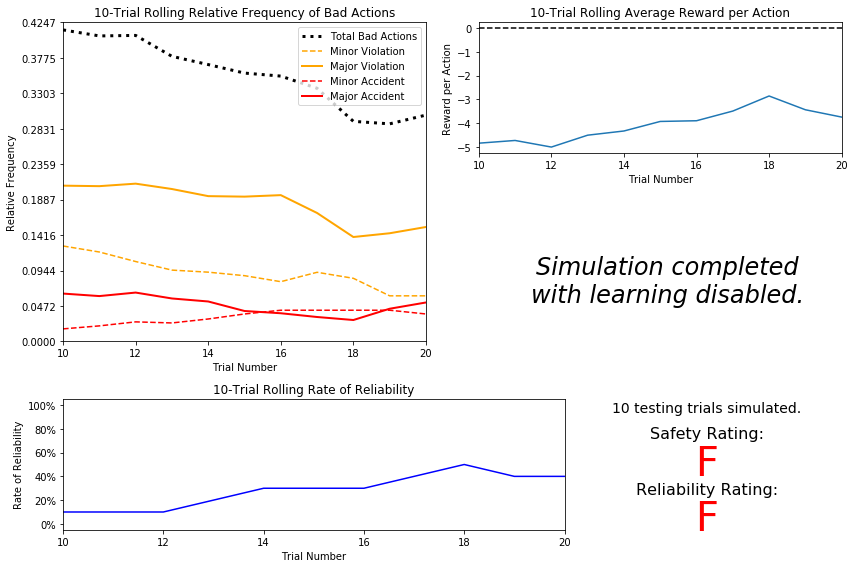

In [3]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### 问题 3
利用上面的从你初始模拟中得到的可视化结果，给出关于驾驶代理程序的分析和若干观察。确保对于可视化结果上的每个面板你至少给出一条观察结果。你可以考虑的一些情况：
- *驾驶代理程序多频繁地做出不良决策？有多少不良决策造成了事故？*
- *假定代理程序是随机驾驶，那么可靠率是否合理？*
- *代理程序对于它的行动会获得什么样的奖励？奖励是否表明了它收到严重的惩罚？*
- *随着试验数增加，结果输出是否有重大变化？*
- *这个智能出租车对于乘客来说，会被人为是安全的且/或可靠的吗？为什么或者为什么不？*

**答案：**

我根据题目对 agent.py 代码进行了一些修改。修改后的代码在每次 action 时会执行一个随机操作，但是并没有使用 Q-Learning 算法。

在对测试日志进行可视化之后，我得出了以下观察结果。

- 在本次运行过程中，smartcab 没有体现出任何智能之处，大约有40%的选择是错误的（违反交规或者引发交通事故），其中重大交通事故发生率约为9%，重大违规行为发生率约为19%；
- 在20次训练过程中，代理程序得到的平均得分在-5分左右，当然，也没有抵达目的地；
- 最终10次测试模拟得到的Safety Rating 和 Reliability Rating 都是 F；
- 如果考虑到本次运行中代理程序是随机驾驶的前提，那么这样的结果其实是合理的，因为代理程序并没有考虑任何环境因素，也没有对已经完成的行为进行学习和修正。
- 在这一阶段，smartcab 不可能被乘客认为是安全或可靠的，它无法运载乘客，也无法保证乘客以及道路上其余车辆的安全。

-----
## 通知驾驶代理程序
创建一个优化Q-Learning的驾驶代理程序的第二步，是定义一系列代理程序会在环境中发生的状态。根据输入、感知数据和驾驶代理程序可用的变量，可以为代理程序定义一系列状态，使它最终可以*学习*在一个状态下它需要执行哪个动作。对于每个状态的`'如果这个处于这个状态就那个行动'`的状况称为**策略**，就是最终驾驶代理程序要学习的。没有定义状态，驾驶代理程序就不会明白哪个动作是最优的——或者甚至不会明白它要关注哪个环境变量和条件！

### 识别状态
查看`'build_state()'`代理程序函数，它显示驾驶代理函数可以从环境中获得下列数据：
- `'waypoint'`，*智能出租车*去向目的地应该行驶的方向，它是*智能出租车*车头方向的相对值。
- `'inputs'`，*智能出租车*的感知器数据。它包括  
  - `'light'`，交通灯颜色。
  - `'left'`，*智能出租车*左侧车辆的目的方向。如果没有车辆，则返回`None`。
  - `'right'`，*智能出租车*右侧车辆的目的方向。如果没有车辆，则返回`None`。
  - `'oncoming'`，*智能出租车*交叉方向车辆的目的方向。如果没有车辆，则返回`None`。
- `'deadline'`，*智能出租车*在时间之内到达目的地还所需的剩余动作数目。

### 问题 4
*代理程序的哪些可用特征与学习**安全性**和**效率**相关性最高？你为什么认为这些特征适合在环境中对**智能出租车**建模？如果你没有选择某些特征，放弃他们的原因是什么？*

**回答：**

- waypoint 对 smartcab 的运行效率应该是密切相关的，因为 waypoint 可以指引 smartcab 接近目的地。<del>而 deadline 可能在模拟评价中能够起到更大的作用，在增加 smartcab 运行效率时并没有帮助。</del>
- deadline 对smartcab的运行也有一定帮助，它可以反映出当前小车的行驶进度，但是采用deadline会产生以下两个问题：
    - 我尝试将 deadlien 添加到代理程序需要考虑的环境数据中，通过粗略的观察 `sim_improved_learning.txt`文件，我发现不同state下的deadline大致在1~29之间，而与之相对的其余的环境数据则只有3~4个变化值。如果在程序中考虑deadline的话，状态空间的大小会增加数十倍，这会导致计算量的增大，更为重要的是，状态空间变得非常离散，反而会削弱代理程序的学习能力。
    - 针对本项目的行驶特点，我们希望小车能够应对随机起点和终点的情况，训练过程中小车的起点和重点当然也是随机的，也就是说deadline这一数据不单单和smartcab的动作有关，它也和整体路程相关，假如我们有两个一样“聪明”的smartcab，但是分别走的是5个街区和30个街区的路程，那么deadline这一数据就不能准确反应smartcab的优劣了。
- <del>对于感知器数据，我认为 light，oncoming 和 left 这三个数据对安全性比较重要，首先，交通信号是保证交通系统运转的重要信号，smartcab 在路口执行的所有操作都必须要参照交通灯的指引，其次，在满足交通灯要求下，还需要关注来向车辆的动态，否则极易引起交通事故。而对于左舵驾驶、双向单车道的交通系统，右侧车辆的信息应该是没有什么作用的。</del>
- 对于感知器数据，经过思考，我认为都应当考虑到模型中来。首先交通信号`light`是保证交通系统运转的重要信号，无视信号数据会大概率引发严重的违规甚至事故；`left right oncoming`三个数据表示的是小车附近车辆的动态，这对小车的安全运行也是即为重要的。

### 定义状态空间
当定义一系列代理程序会处于的状态，必需考虑状态空间的*大小*。就是说，如果你期望驾驶代理程序针对每个状态都学习一个**策略**，你会需要对于每一个代理状态都有一个最优的动作。如果所有可能状态的数量非常大，最后会变成这样的状况，驾驶代理程序对于某些状态学不到如何行动，会导致未学习过的决策。例如，考虑用下面的特征定义*智能出租车*的状态的情况：

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.
发生如`(False, True, True, True, False, False, '3AM')`的状态的频次如何？没有近乎无限数量的训练，很怀疑代理程序会学到一个合适的动作！

### 问题 5
*如果用你在**问题4**中选择的特征来定义一个状态，状态空间的大小是多少？假定你了解环境以及它是如何模拟的，你觉得经过合理数量的训练之后，代理驾驶能学到一个较好的策略吗？（遇见绝大部分状态都能作出正确决策。）*
**提示：** 考虑特征*组合*来计算状态的总数！

**回答：**

以下是我在问题4中选择的特征以及他们可能出现的状态：

|特征|status|
|---|---|
|waypoint|foward,left,right|
|light|red,green|
|left|foward,left,right,None|
|right|foward,left,right,None|
|oncoming|foward,left,right,None|

那么这5个特征的可能组合状态有 $3\times2\times4\times4\times4=384$ 种。

需要指出的是，虽然`waypoint`拥有四个取值，但是在小车抵达目的地之前，这个值只有可能是`foward,left,right`中的一种。

另外，如果将smartcab选择的action考虑进来，这个组合状态则变为$4\times384=1536$

这个空间大小对于当前的算力应该是可以完成的的，我认为通过合理数量的训练代理价是可以得到一个较好的策略。为了证实这一观点，我将问题简化为：对1536个样本进行独立随机抽取，需要多少次随机才能覆盖大部分或者全部样本？在代码实现过程中，我使用1~384的整数作为样本，使用`random.choice`作独立随机抽取。代码如下：

In [4]:
import random

choices = []

probs = [i for i in range(1,1537)]

i = 0
while i<15000:
    choices.append(random.choice(probs))    
    i+=1

13792


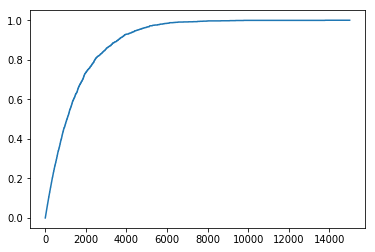

In [5]:
set_lenth = [len(set(choices[:i])) for i in range(len(choices))]
full_prob_point = set_lenth.index(1536)
print full_prob_point

import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.array(set_lenth)/1536.0)

上图的曲线表示的是随机抽取覆盖的样本比例随随机次数增加的变化曲线，可以看出：

在3000次之前，覆盖比例快速增加至80%左右，随后增速逐渐变缓，最终在第11734次随机抽取时覆盖了全部样本。

将这一过程重复多次，以观察是否出现一定规律。下面的代码将这一过程重复了10次，并输出了每次覆盖95%样本所需的抽取次数以及覆盖100%样本的抽取次数。

In [6]:
def test(n_test=10):
    while n_test>0:
        choices = []

        probs = [i for i in range(1,1537)]

        i = 0
        while i<15000:
            choices.append(random.choice(probs))    
            i+=1
        set_lenth = [len(set(choices[:i])) for i in range(len(choices))]
        pp_95 = set_lenth.index(1460)
        print pp_95
        
        n_test-=1

# test(100)
test()

4579
4459
4396
4568
4806
4678
4492
4593
4432
4332


从上面的输出可以看出，覆盖95%样本所需的随机次数基本上都在4500附近，那么可以简单的认为，如果我们的Q-table中能够表现出4500个不同state下不同action的分数，那么绝大多数的条件就已经涵盖在内了。

### 附加回答：

在代码实现过程中，我在选定action这一步骤增加了一个随机选择，即在给定状态下的Q值下，选择可选动作中的最大值对应的动作或者随机选择多个相同最大值中的一个作为操作反馈。在完成项目过程中我并没有对这一点进行太多的思考，随机选择这一选择也不过是我“随机选择”的 :-P。经过思考后，我认为的原因如下：

在参考maxQ进行选择时，我发现当前state下的Q-table有以下三种可能形式：
1. 代理程序面临的是陌生state，此时所有可能动作对应的Q值均为0，如下：

    `('left', 'green', 'right', 'left', None)
     -- forward : 0.00
     -- right : 0.00
     -- None : 0.00
     -- left : 0.00`
     
- 代理程序面临的是已有经验的state，此时有且仅有唯一的maxQ，如下：

    `('forward', 'green', 'forward', None, None)
     -- forward : 1.52
     -- right : 0.00
     -- None : -5.02
     -- left : 0.00`
     
- 代理程序面临的是已有经验的state，但存在不唯一的maxQ，如下：

    `('forward', 'red', 'right', 'right', 'right')
     -- forward : -5.31
     -- right : 0.00
     -- None : 0.00
     -- left : 0.00`
         
在模拟过程中，情况1选择最大值即可。情况1和3中重复的最大值为0，这两种情况可以归结为：该state下，除了未知动作，还未尝试过正确（或者说是能够得到正反馈）的动作。那么maxQ对应的动作均为未知动作，那这2个或者3个0值action并不是说就是当前情况下较好的动作，所以我们需要进行随机选择对这些动作进行探索。如果只选择并列maxQ中固定位置（如第一个）的值，就有可能将真正正确的值隐藏起来。

### 更新驾驶代理程序的状态
要完成你的第二个实现，去到`'build_state()'`代理程序函数。根据你在**问题4**给出的判断，你现在要将`'state'`变量设定为包含所有Q-Learning所需特征的元组。确认你的驾驶代理程序通过运行代理程序文件和模拟会更新它的状态，注意状态是否显示了。如果用了可视化模拟，确认更新的状态和在模拟程序里看到的一致。

**注意：** 观察时记住重置模拟程序的标志到默认设定！

-----
## 实现Q-Learning驾驶代理程序
创建一个优化Q-Learning的驾驶代理程序的第三步，是开始实现Q-Learning自身的功能。Q-Learning的概念相当直接：每个访问的状态，为所有可用的状态-行动配对在Q-table里创建一条记录。然后，当代理程序遇到一个状态并执行了一个动作，基于获得的奖励和设定的相互的更新规则，来更新关联的状态-动作配对的Q-value。当然，Q-Learning还带来其他的收益，如此我们可以让代理程序根据每个可能的状态-动作配对的Q-values，来为每个状态选择*最佳*动作。在这个项目里，你会实现一个*衰减* $\epsilon$ *-贪心* 的Q-learning算法，不含折扣因子。遵从每个代理程序函数的**TODO**下的实现指导。

注意代理程序的属性`self.Q`是一个字典：这就是Q-table的构成。每个状态是`self.Q`字典的键，每个值是另一个字典，包含了*action*和*Q-value*。这里是个样例：

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

此外，注意你要求利用一个*衰减*$\epsilon$*（探索）因子*。因此，随着试验的增加，$\epsilon$会向0减小。这是因为，代理程序会从它的行为中学习，然后根据习得的行为行动。而且当$\epsilon$达到特定阈值后（默认阈值为0.01），代理程序被以它所学到的东西来作检测。作为初始的Q-Learning实现，你将实现一个线性衰减$\epsilon$的函数。

### Q-Learning模拟结果
要从最初的Q-learning程序获得结果，你需要调整下面的标志和设置：
- `'enforce_deadline'` - 将此标志设定为`True`来强制驾驶代理程序捕获它是否在合理时间内到达目的地。
- `'update_delay'` - 将此标志设定为较小数值（比如`0.01`）来减少每次试验中每步之间的时间。
- `'log_metrics'` - 将此标志设定为`True`将模拟结果记录为在`/logs/`目录下的`.csv`文件，Q-table存为`.txt`文件。
- `'n_test'` - 将此标志设定为`'10'`则执行10次测试试验。
- `'learning'` - 将此标志设定为`'True'`来告诉驾驶代理使用你的Q-Learning实现。

此外，使用下面的$\epsilon$衰减函数：

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

如果你在实施时遇到困难，尝试把`'verbose'`标志设为`True`来调试。调试时，在这里设定的标志会返回到它们的默认设定。重要的是你要理解每个标志做什么并且解释它们怎么影响模拟！

当你成功完成初始的Q-Learning模拟程序后，运行下面代码单元格来使结果可视化。注意当相同的模拟运行时，log文件会被覆写，所以要留意载入的log文件！

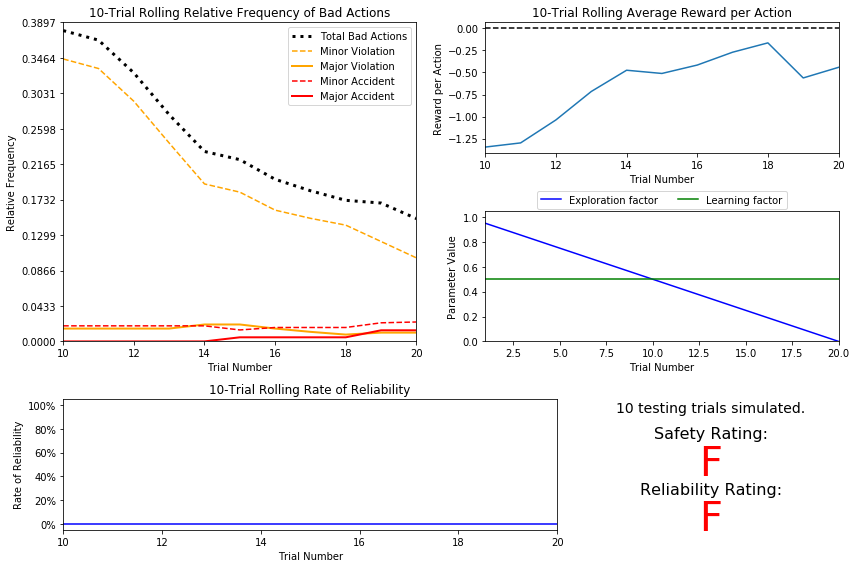

In [7]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### 问题 6
利用上面的从你默认的Q-Learning模拟中得到的可视化结果，像在**问题3**那样，给出关于驾驶代理程序的分析和若干观察。注意模拟程序应该也产生了Q-table存在一个文本文件中，可以帮到你观察代理程序的算法。你可以考虑的一些情况：
- *有没有观察到基本驾驶代理程序和默认的Q-Learning代理程序的相似之处？*
- *在测试之前驾驶代理大约需要做多少训练试验？在给定的$\epsilon$ 容忍度下，这个数字是否合理？*
- *你实现的$\epsilon$（探索因子）衰减函数是否准确地在参数面板中显示？*
- *随着试验数增加，不良动作的数目是否减少?平均奖励是否增加？*
- *与初始的驾驶代理程序相比，安全性和可靠性评分怎样？*

**回答：**

本次计算中使用了 Q_Learning 算法，建立考虑多种情况的 Q_table。 在进行每一步的决策时，按照 Epsilon 概率进行了随机选择或 maxQ 选择。从最终的可视化结果来看，虽然这一次的测试评分仍然很低，但是模型在事故率、每次动作的评分上来看已经有了较为明显的进步。通过观察，我得出了以下几点信息：

- 在第一次训练中，基本大利程序和默认 Q_learning 的事故率、动作评分很接近，都处在一个很差的水平；
- 代理进行了20次训练，在这里我根据题目建议将 epsilon 设为了0.05，所以这个训练次数是合理的；
- 结果图中准确的显示了探索因子随着训练次数增加而衰减的过程；
- 在上面的可视化结果中，可以看到，随着试验次数增加，Total bad actions 和 Minor violation 的次数从一个较高的初始值快速减小至较低的值，其余的不良动作由于初始值较小发生的变化则较不明显。我运行了多次 agent 程序，由于随机数的不同，所以也得到了不同的结果，但是总体上仍显示出，多种不良行为的发生率有显著显小。同样的，平均奖励整体上呈现为明显的递增趋势。
- 在修改随机数种子进行了多次运算之后，可以得出，当前的代理程序比初始驾驶程序在安全性上有一定的进步，但是仍然无法得到理想的结果。

-----
## 改进Q-Learning驾驶代理程序
创建一个优化Q-Learning的驾驶代理程序的第三步，是执行优化！现在Q-Learning算法已经实现并且驾驶代理程序已经成功学习了，需要调整设定、调节参数让驾驶代理程序学习**安全性**和**效率**。通常这一步需要很多试验和错误，因为某些设定必定会造成更糟糕的学习。要记住的一件事是学习的行为本身和需要的时间：理论上，我们可以允许代理程序用非常非常长的时间来学习；然而，Q-Learning另一个目的是*将没有习得行为的试验试验变为有习得行为的行动*。例如，训练中总让代理程序执行随机动作（如果$\epsilon = 1$并且永不衰减）当然可以使它*学习*，但是不会让它*行动*。当改进你的Q-Learning实现时，要考虑做一个特定的调整的意义，以及它是否逻辑上是否合理。

### 改进Q-Learning的模拟结果
要从最初的Q-learning程序获得结果，你需要调整下面的标志和设置：
- `'enforce_deadline'` - 将此标志设定为`True`来强制驾驶代理程序捕获它是否在合理时间内到达目的地。
- `'update_delay'` - 将此标志设定为较小数值（比如`0.01`）来减少每次试验中每步之间的时间。
- `'log_metrics'` - 将此标志设定为`True`将模拟结果记录为在`/logs/`目录下的`.csv`文件，Q-table存为`.txt`文件。
- `'learning'` - 将此标志设定为`'True'`来告诉驾驶代理使用你的Q-Learning实现。
- `'optimized'` - 将此标志设定为`'True'`来告诉驾驶代理你在执行一个优化版本的Q-Learning实现。

优化Q-Learning代理程序可以调整的额外的标志：
- `'n_test'` - 将此标志设定为某个正数（之前是10）来执行那么多次测试试验。
- `'alpha'` - 将此标志设定为0 - 1之间的实数来调整Q-Learning算法的学习率。
- `'epsilon'` - 将此标志设定为0 - 1之间的实数来调整Q-Learning算法的起始探索因子。
- `'tolerance'` - 将此标志设定为某个较小的大于0的值（默认是0.05）来设定测试的epsilon阈值。

此外，使用一个你选择的$\epsilon$ (探索因子)衰减函数。注意无论你用哪个函数，**一定要以合理的速率衰减**到`'tolerance'`。Q-Learning代理程序到此才可以开始测试。某个衰减函数的例子($t$是试验的数目)：

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$

如果你想的话，你也可以使用$\alpha$ （学习率） 的衰减函数，当然这通常比较少见。如果你这么做了，确保它满足不等式$0 \leq \alpha \leq 1$。
如果你在实施时遇到困难，尝试把`'verbose'`标志设为`True`来调试。调试时，在这里设定的标志会返回到它们的默认设定。重要的是你要理解每个标志做什么并且解释它们怎么影响模拟！

当你成功完成初始的Q-Learning模拟程序后，运行下面代码单元格来使结果可视化，请注意为了达到项目要求你需要在安全性和可靠性上获得至少都为A的评分。注意当相同的模拟运行时，log文件会被覆写，所以要留意载入的log文件！

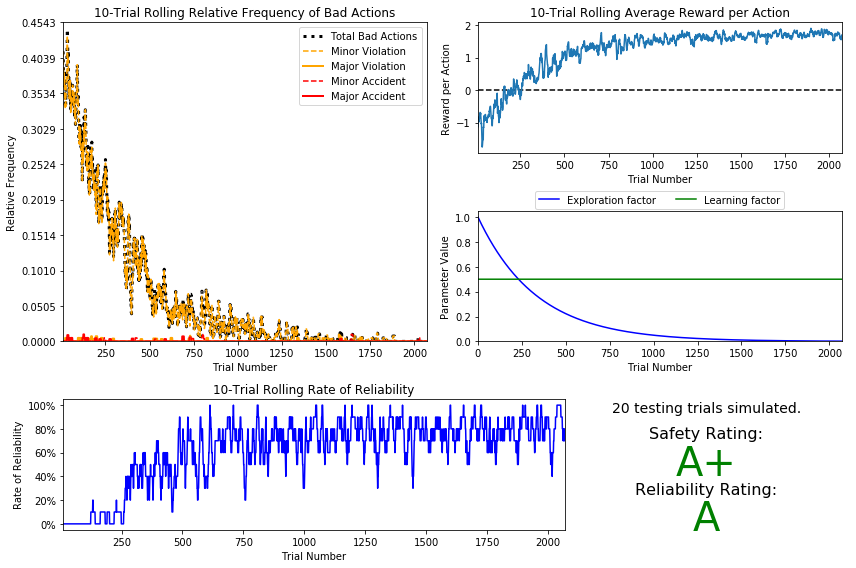

In [10]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation

# %run -d smartcab/agent.py
vs.plot_trials('sim_improved-learning.csv')

### 问题7
利用上面的从你改进的Q-Learning模拟中得到的可视化结果，像在**问题6**那样，给出关于改进的驾驶代理程序的最终分析和观察。你需要回答的问题：
- *使用了什么epsilon（探索因子）的衰减函数？*
- *在测试之前驾驶代理大约需要做多少训练试验？*
- *你用了什么epsilon-tolerance和alpha（学习率）值？为什么？*
- *与之前的默认Q-Learning学习器相比，这个Q-Learning学习器有多少改进？ *
- *你会说Q-Learning学习器的结果表明了你的驾驶代理程序成功地学习了一个合适的策略吗？*
- *你对*智能出租车*的安全性和可靠性评分满意吗？*

**回答：**

通过网上资料和评阅人的指导，我对Q-learning的两个重要因素：epsilon和alpha有了以下了解：

- 通过一个epsilon概率，我们可以控制代理程序选择action的方式是随机选择还是通过maxQ来选择。
- 通过设定epsilon的衰减函数，我们可以不断调整epsilon概率。因为在训练前期，代理程序的经验很少，需要通过随机过程来尝试尽可能多的状态，而在一定的训练次数之后，我们则希望代理程序能够逐渐更多的参考已经学习到的经验。
- 通过epsilon衰减函数以及epsilon tolerance的调整，我们还可以对整个训练过程中，不同阶段epsilon的变化幅度或速率以及整体训练次数进行调整。
- 通过设定alpha，我们可以平衡当前reward和已有Q两者的权重，高于0.5的alpha意味着模型更加激进，更看重新的reward，而低于0.5的alpha则意味着模型更加保守，更看重已经积累的经验。所以我在这里选择0.5作为alpha的值，以期得到一个较为平衡的学习过程。


在改进的过程中，我尝试了不同的 epsilon decay function 和不同 alpha 的组合。通过观察不同尝试的结果，我得出了以下认识：

- 衰减函数对最终结果的影响是很大的，因为它直接影响到了Q-learning过程的训练次数，简单的来说，更多的训练次数在多数情况下会带来更理想的模拟结果。
- epsilon 衰减函数可以大致分为三种：
    - 线性衰减：衰减速率保持固定，例如$\epsilon -= step $ 
    - 凸函数衰减：前期衰减速率较小，衰减速率随着训练次数增加而增大，例如 $\epsilon = cos(0.01n)$
    - 凹函数衰减：前期快速衰减，衰减速率随着训练次数增加而减小，例如 $\epsilon = a^n 0<a<1$
    
    凹函数能够让小车的错误率在前期训练中快速收敛
- 在相同的`random seed(42)`下，将alpha从0.3逐渐调整至0.8，在其他条件相同时，随着alpha的增大，通过多次计算，可以看出在alpha=0.5时，结果相对较好，这是合理的。


在选定合适的epsilon tolerance时，我也考虑了该值对训练次数的影响，因为我认为训练次数对最终模型评分的影响非常大，如果模型使用了一个合理的alpha值和一个合理的epsilon decay函数，但是epsilon tolerance取值过大，导致训练次数很低（例如仅训练了100次），那么这个模型也是无法获得理想结果的。

在上一个问题经过多次尝试之后，我确定了训练参数，得出以下结论：

- 我使用了1作为 epsilon 的初值，$\epsilon = 0.995^n$作为 epsilon 的衰减函数，因为我认为前期训练需要快速降低 agent 的失误率，在后期训练中，则需要一个稳定的收敛过程，因此一个凹函数是有必要的。
- 通过多次运行程序的经验，我认为程序需要运行2000次左右的训练可以得到稳定的结果，所以最终选择 tolerance 为0.002，大约需要2100次的训练，此时的错误行为率已经渐渐收敛至一个极低的数值，行为评分也逐渐平稳，最终评分为A+、A；
- 我认为 Q-Learning 学习器的结果已经表明代理程序成功的学习了一个合适的策略；
- 通过多次运行 agent 程序，我对智能出租车的安全性和可靠性评分表示满意。

### 定义一个最优策略

有时，对于重要的问题*“我要让我的代理程序学习什么？”*的答案，只是理论性的，无法具体描述。然而这里，你可以具体定义代理程序要学什么，就是美国通行权交通法案。这些法律是已知信息，你可以基于这些法律，为*智能出租车*进一步定义每一个状态所做的最优动作。在那种情况下，我们称这一系列最优状态-动作配对为**最优策略**。因此，不像那些理论性的回答，不仅通过收到的奖励（惩罚），而且纯观察，代理程序是否在“错误”地行动能很清晰地得知。如果代理程序闯了红灯，我们既看见它获得了一个负面奖励，也知道这是一个错误的行为。这可以用来帮你验证驾驶代理程序习得的**策略**是否正确，或只是个**次优策略**。

### 问题 8
给出几个关于最优策略是什么样子的例子（用你已定义的状态）。之后，查看`'sim_improved-learning.txt'`文本文件，看你的改进的Q-Learning算法的结果。_每个从模拟中纪录的状态，对于给定的状态，**策略**（得分最高的动作）是否正确？是否对于有些状态，有策略不同于预期的最优策略？_给出一个状态和记录的状态-动作的奖励，解释为什么正是个正确的策略。

**回答：** 

我在代理程序中关注的环境状态是：

`waypoint, inputs['light'], inputs['left'], inputs['right'], inputs['oncoming']`

在现实中，为了遵循交通规则（在本项目中简化为红灯不能直行和左转），我们看到红灯就应当停车；如果绿灯时周边车辆的行驶方向和我们准备行驶的方向相同，那么我们应当减速慢行以免碰撞事故的发生（在本项目中则应当停车至路径方向顺畅）；如果交通灯为绿灯，且周边车辆的行驶方向不会影响我们的行驶，那我们就按照既定的方向行驶。

在查看结果之前，我先考虑两个例子：

- ('forward', 'green', 'right', None, 'right'),即目标方向向前、绿灯、左侧车辆在左转、右侧车辆静止、来向车辆在右转。
    - 按照我的想法，此时车辆可以执行前进动作，而如果静止不动则可能会对后车产生影响。
- ('right', 'red', 'forward', 'forward', 'forward')，即目标方向向右、红灯、左侧、右侧以及来向车辆都在前行。
    - 显然，此时车辆应当停车等待红灯，考虑到交通灯，车辆进行前进和左转会违反交通规定，右转则不会违反交通规定；考虑到周边车辆，车辆进行执行、左转和右转都有可能引发交通事故。
    

查看上面两个state在结果文本中的Q值如下：

- ` -- forward : 1.52
 -- right : 0.00
 -- None : -5.58
 -- left : 0.00`

- ` -- forward : -19.54
 -- right : -9.77
 -- None : 1.97
 -- left : 0.00`
 
可以看出，两个state中动作对应的Q值和我的直观判断相符。

可以注意到，`'sim_improved-learning.txt'`文本中总共有384个state，这和之前估计的状态空间大小是相符的。说明代理程序在训练过程中对所有的可能state都进行了至少一次的学习。

-----
### 选做：未来奖励 - 折扣因子 `'gamma'`
也许你会好奇，作为Q-Learning算法的一部分，之前要求你在实现中**不要**使用折扣引子`'gamma'`。在算法中包含未来奖励能有助于在未来状态回溯到当前状态时的反向正面奖励。本质上，如果给予驾驶代理程序执行若干动作到达不同状态的选择，包含未来奖励会是代理程序偏向可以得到更多奖励的状态。一个例子是驶向目的的驾驶代理程序：所有行动和奖励都相等，那么理论上如果到达目的地会有额外奖励，驶向目的会获得更好的奖励。然而，即使在这个项目里，驾驶代理程序也要在规定的时间里到达目的地，包含未来奖励不会有益于代理程序。实际上，如果代理程序给予多次试验学习，它甚至会给Q-value带来负面影响！

### 可选问题 9
*在项目中有两个特点使得未来奖励在这个Q-Learning算法无效。一个特点是关于*智能出租车*本身，另一个是关于环境。你能指出它们是什么以及为什么未来奖励不会在这个项目中起效？*

**回答：**

- 在smartcab行驶过程中，环境因素一直在变化，因此，smartcab在未来遇到的state其实是无迹可寻的。那么未来的action得到的reward也当然是没有规律的，如果我们考虑了未来奖励，那么就相当于Q-table中的Q值有一部分是没有任何规律（或者说是随机的，我不确定这么说合不合适）。因此未来奖励反而有可能打乱已有的较正确的经验；
- 和我不选择deadline的理由相同，在这个项目中，每次训练的起点和终点是随机的，因此当前state到抵达终点这一过程并没有泛化性，在A训练中的经验放到B训练中可能会适得其反。
- 我猜想，未来奖励可能适合未来的state相对确定的案例，比如训练程序走迷宫，或者优化一条固定的物流线路等等。

> **注意**:当你写完了所有的代码，并且回答了所有的问题。你就可以把你的 iPython Notebook 导出成 HTML 文件。你可以在菜单栏，这样导出**File -> Download as -> HTML (.html)**把这个 HTML 和这个 iPython notebook 一起做为你的作业提交。